<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#GradCam" data-toc-modified-id="GradCam-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GradCam</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li><li><span><a href="#GradCam-+-SmoothGrad" data-toc-modified-id="GradCam-+-SmoothGrad-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GradCam + SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [14]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from utils import get_example_params, rescale_image
from attribution_methods.saliencys import GradCam, CamExtractor
from attribution_methods.ensembles import generate_smooth_grad

# Data Load

In [2]:
original_images_mnist, pre_images_mnist, mnist_classes, mnist_model = get_example_params('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_example_params('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


In [4]:
layers = ['Conv1','BatchNorm1','ReLU1','MaxPool1','Conv2','BatchNorm2','ReLU2','MaxPool2','Conv3','BatchNorm3','ReLU3','MaxPool3']

# GradCam

## MNIST

In [5]:
nb_class = 10
nb_layer = 12
outputs = np.zeros((nb_layer*nb_class,)+original_images_mnist.shape[1:-1], dtype=np.float32)
probs = np.zeros(nb_layer*nb_class)
preds = np.zeros(nb_layer*nb_class)

for layer_idx in range(nb_layer):
    grad_cam_mnist = GradCam(mnist_model)
    for i in range(nb_class):
        img = pre_images_mnist[i].unsqueeze(0)
        output, prob, pred = grad_cam_mnist.generate_image(img, layer_idx, i)
        outputs[i+(nb_class*layer_idx)] = output
        probs[i+(nb_class*layer_idx)] = prob
        preds[i+(nb_class*layer_idx)] = pred

../code\gradcam.py:69: RuntimeWarning: invalid value encountered in true_divide
  cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))


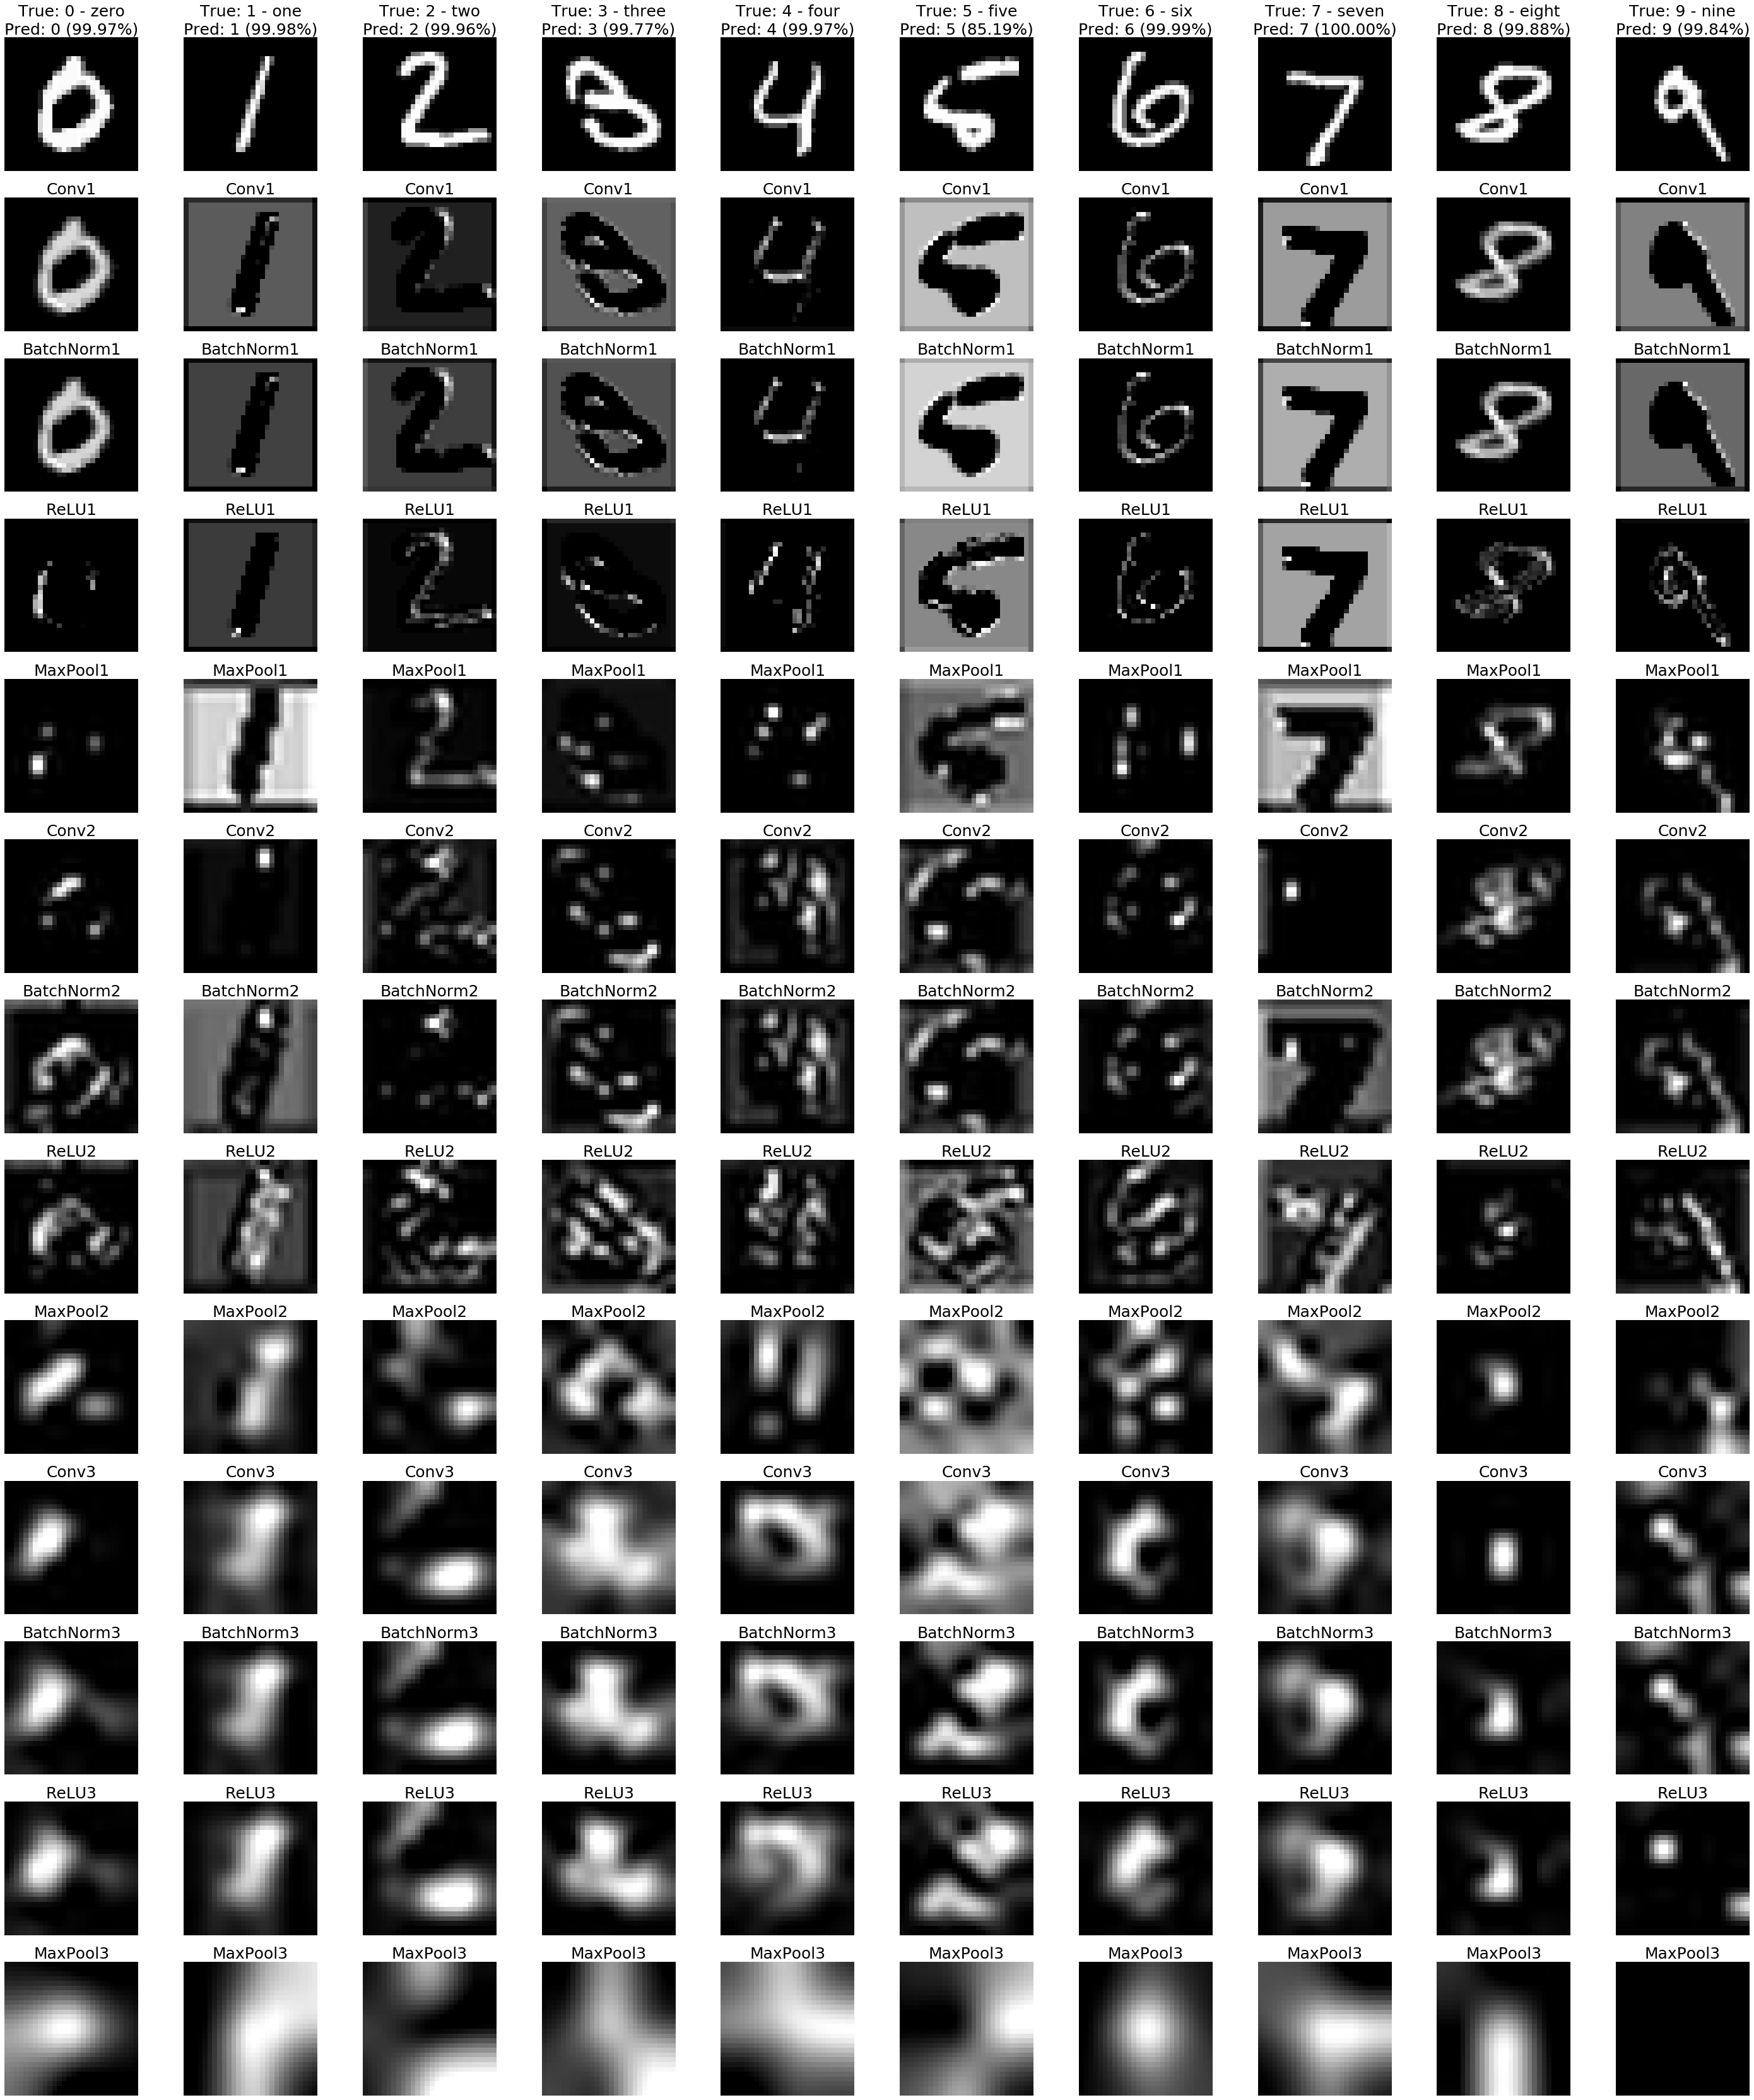

In [6]:
f, ax = plt.subplots(1+nb_layer,10,figsize=(50,5*nb_layer))
for i in range(10):
    ax[0,i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
for i in range(nb_layer):
    for j in range(nb_class):
        ax[i+1,j].imshow(outputs[j+(nb_class*i)], 'gray')
        ax[i+1,j].set_title(layers[i], size=25)
        ax[i+1,j].axis('off')

## CIFAR10

In [7]:
nb_class = 10
nb_layer = 12
outputs = np.zeros((nb_layer*nb_class,)+original_images_cifar10.shape[1:-1], dtype=np.float32)
probs = np.zeros(nb_layer*nb_class)
preds = np.zeros(nb_layer*nb_class)

for layer_idx in range(nb_layer):
    grad_cam_cifar10 = GradCam(cifar10_model)
    for i in range(nb_class):
        img = pre_images_cifar10[i].unsqueeze(0)
        output, prob, pred = grad_cam_cifar10.generate_image(img, layer_idx, i)
        outputs[i+(nb_class*layer_idx)] = output
        probs[i+(nb_class*layer_idx)] = prob
        preds[i+(nb_class*layer_idx)] = pred

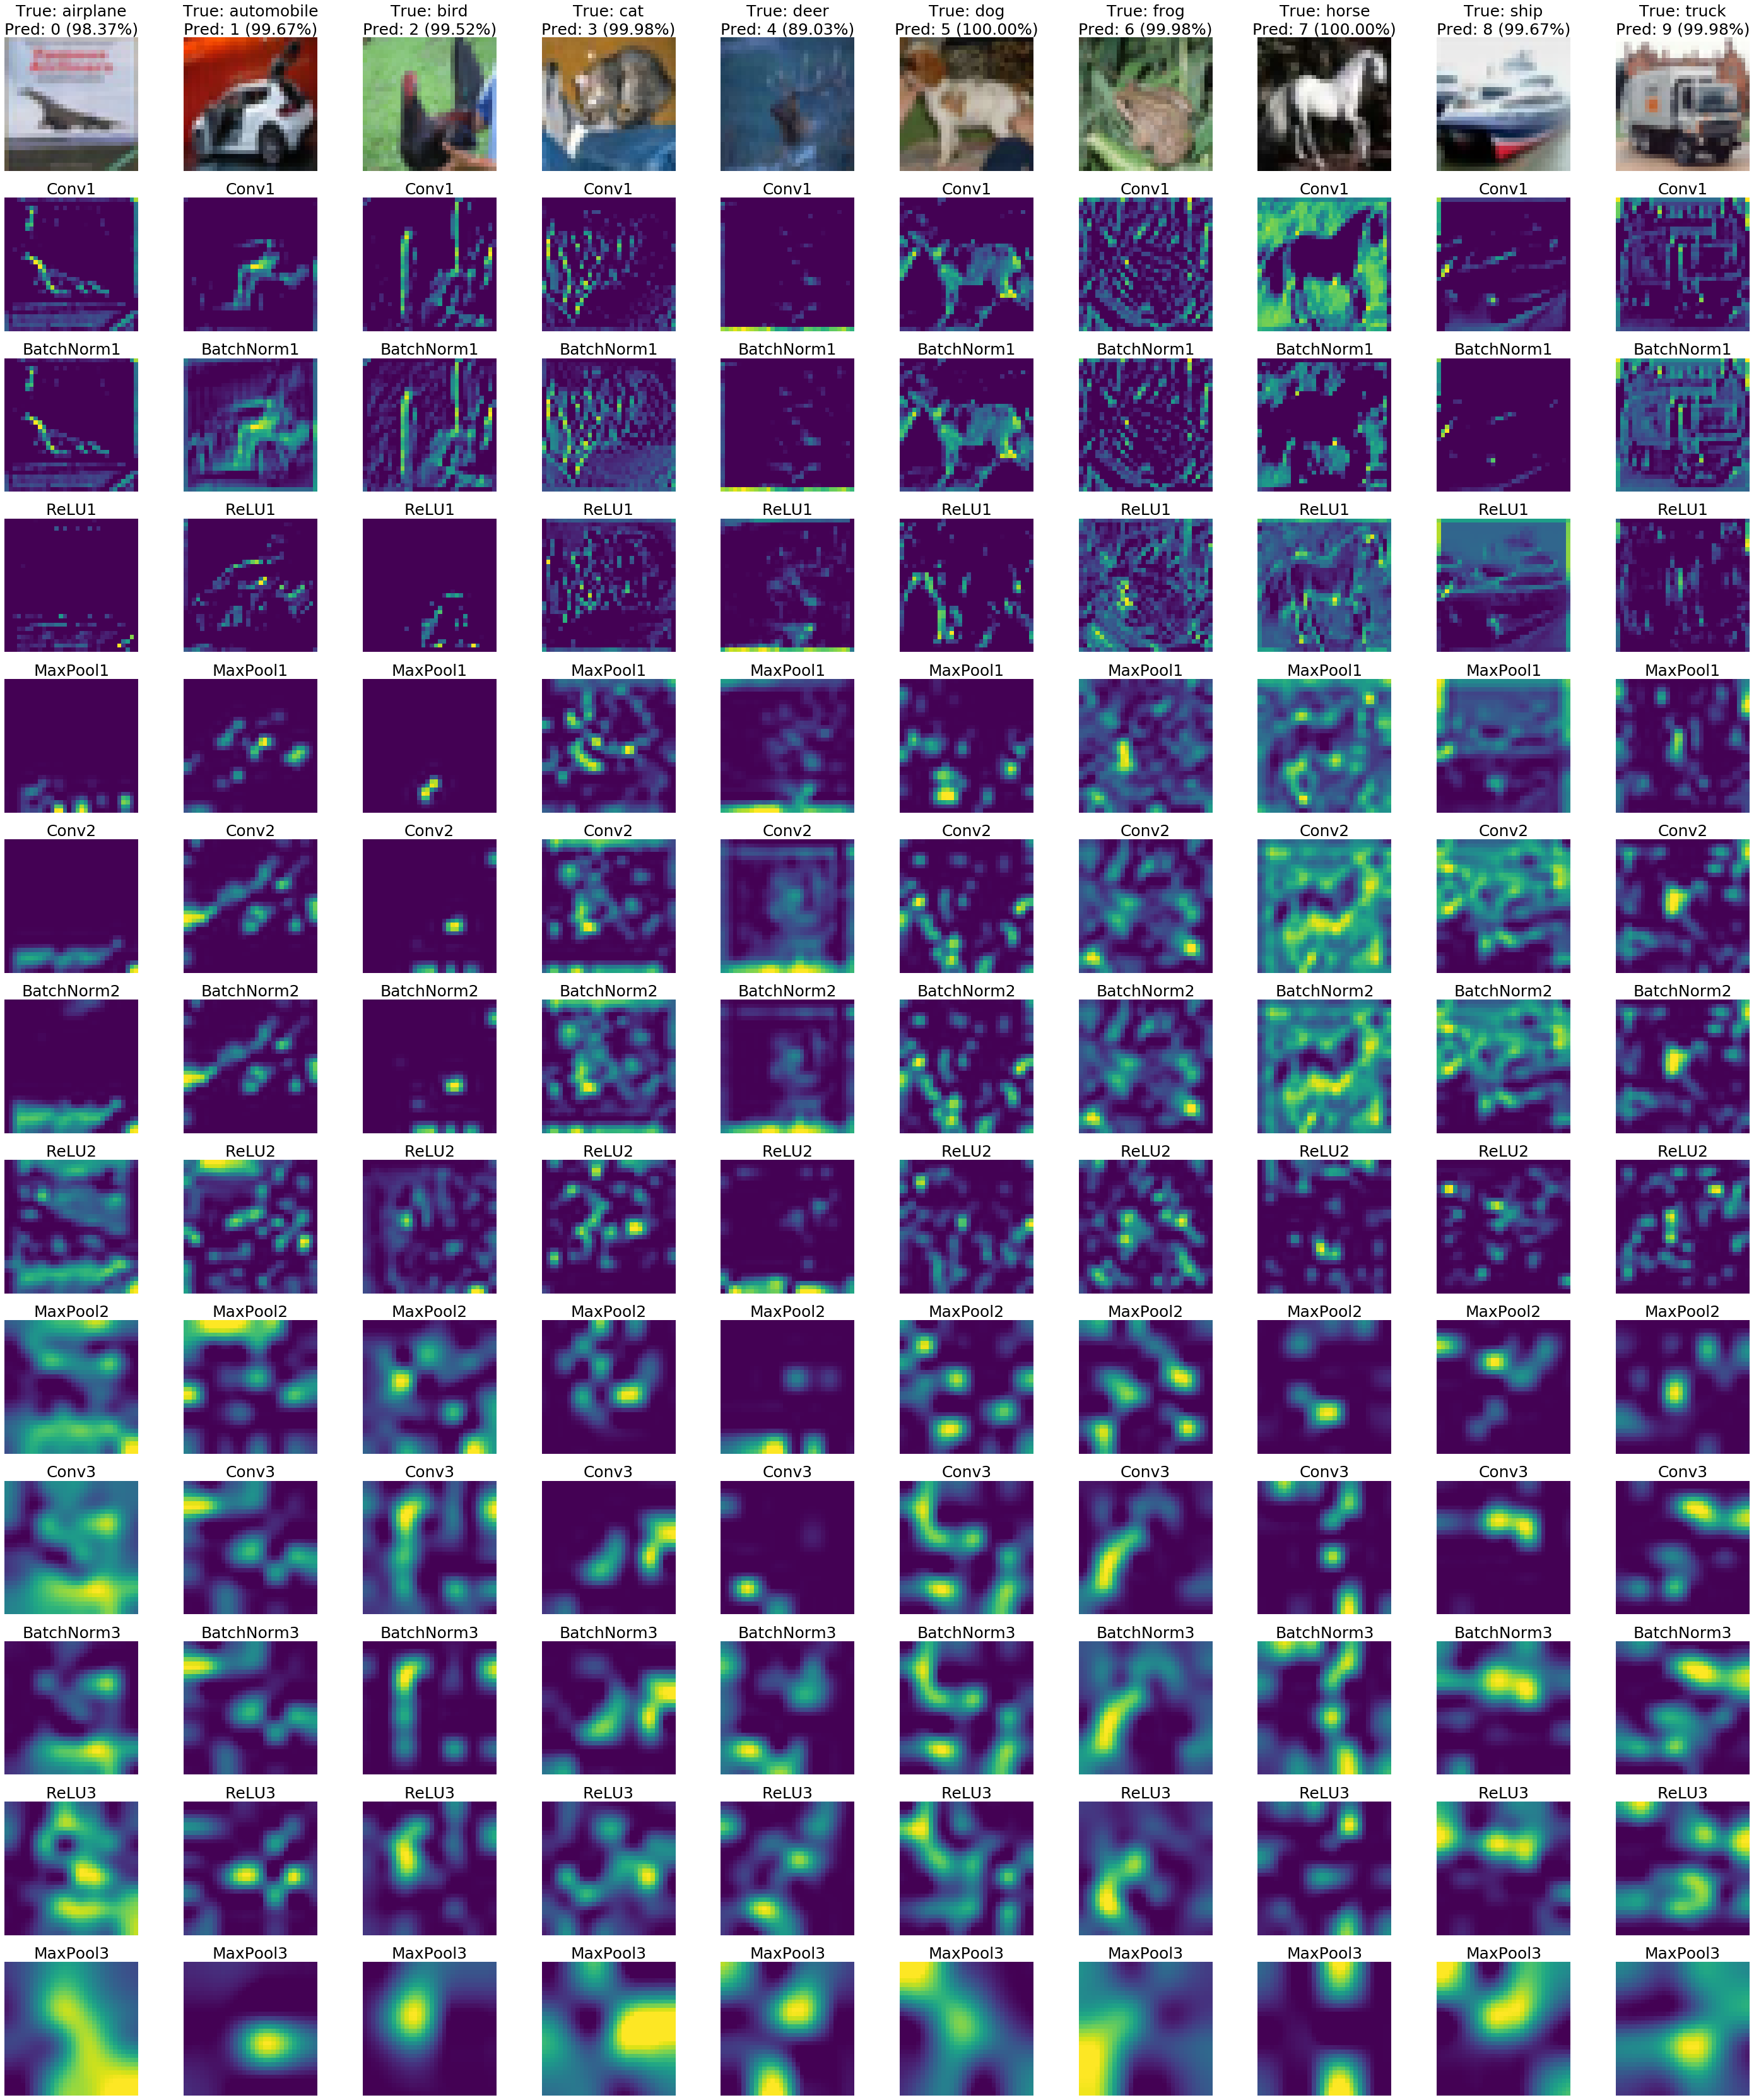

In [8]:
f, ax = plt.subplots(1+nb_layer,10,figsize=(50,5*nb_layer))
for i in range(10):
    ax[0,i].imshow(original_images_cifar10[i].squeeze())
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
for i in range(nb_layer):
    for j in range(nb_class):
        ax[i+1,j].imshow(outputs[j+(nb_class*i)])
        ax[i+1,j].set_title(layers[i], size=25)
        ax[i+1,j].axis('off')

# GradCam + SmoothGrad

## MNIST

In [9]:
nb_class = 10
nb_layer = 12
outputs = np.zeros((nb_layer*nb_class,)+original_images_mnist.shape[1:-1], dtype=np.float32)
probs = np.zeros(nb_layer*nb_class)
preds = np.zeros(nb_layer*nb_class)

n = 50
sigma = 3
output_size = (28,28)

for layer_idx in range(nb_layer):
    grad_cam_mnist = GradCam(mnist_model)
    for i in range(nb_class):
        img = pre_images_mnist[i].unsqueeze(0)
        output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, layer_idx, grad_cam_mnist, i)
        outputs[i+(nb_class*layer_idx)] = output
        probs[i+(nb_class*layer_idx)] = prob
        preds[i+(nb_class*layer_idx)] = pred

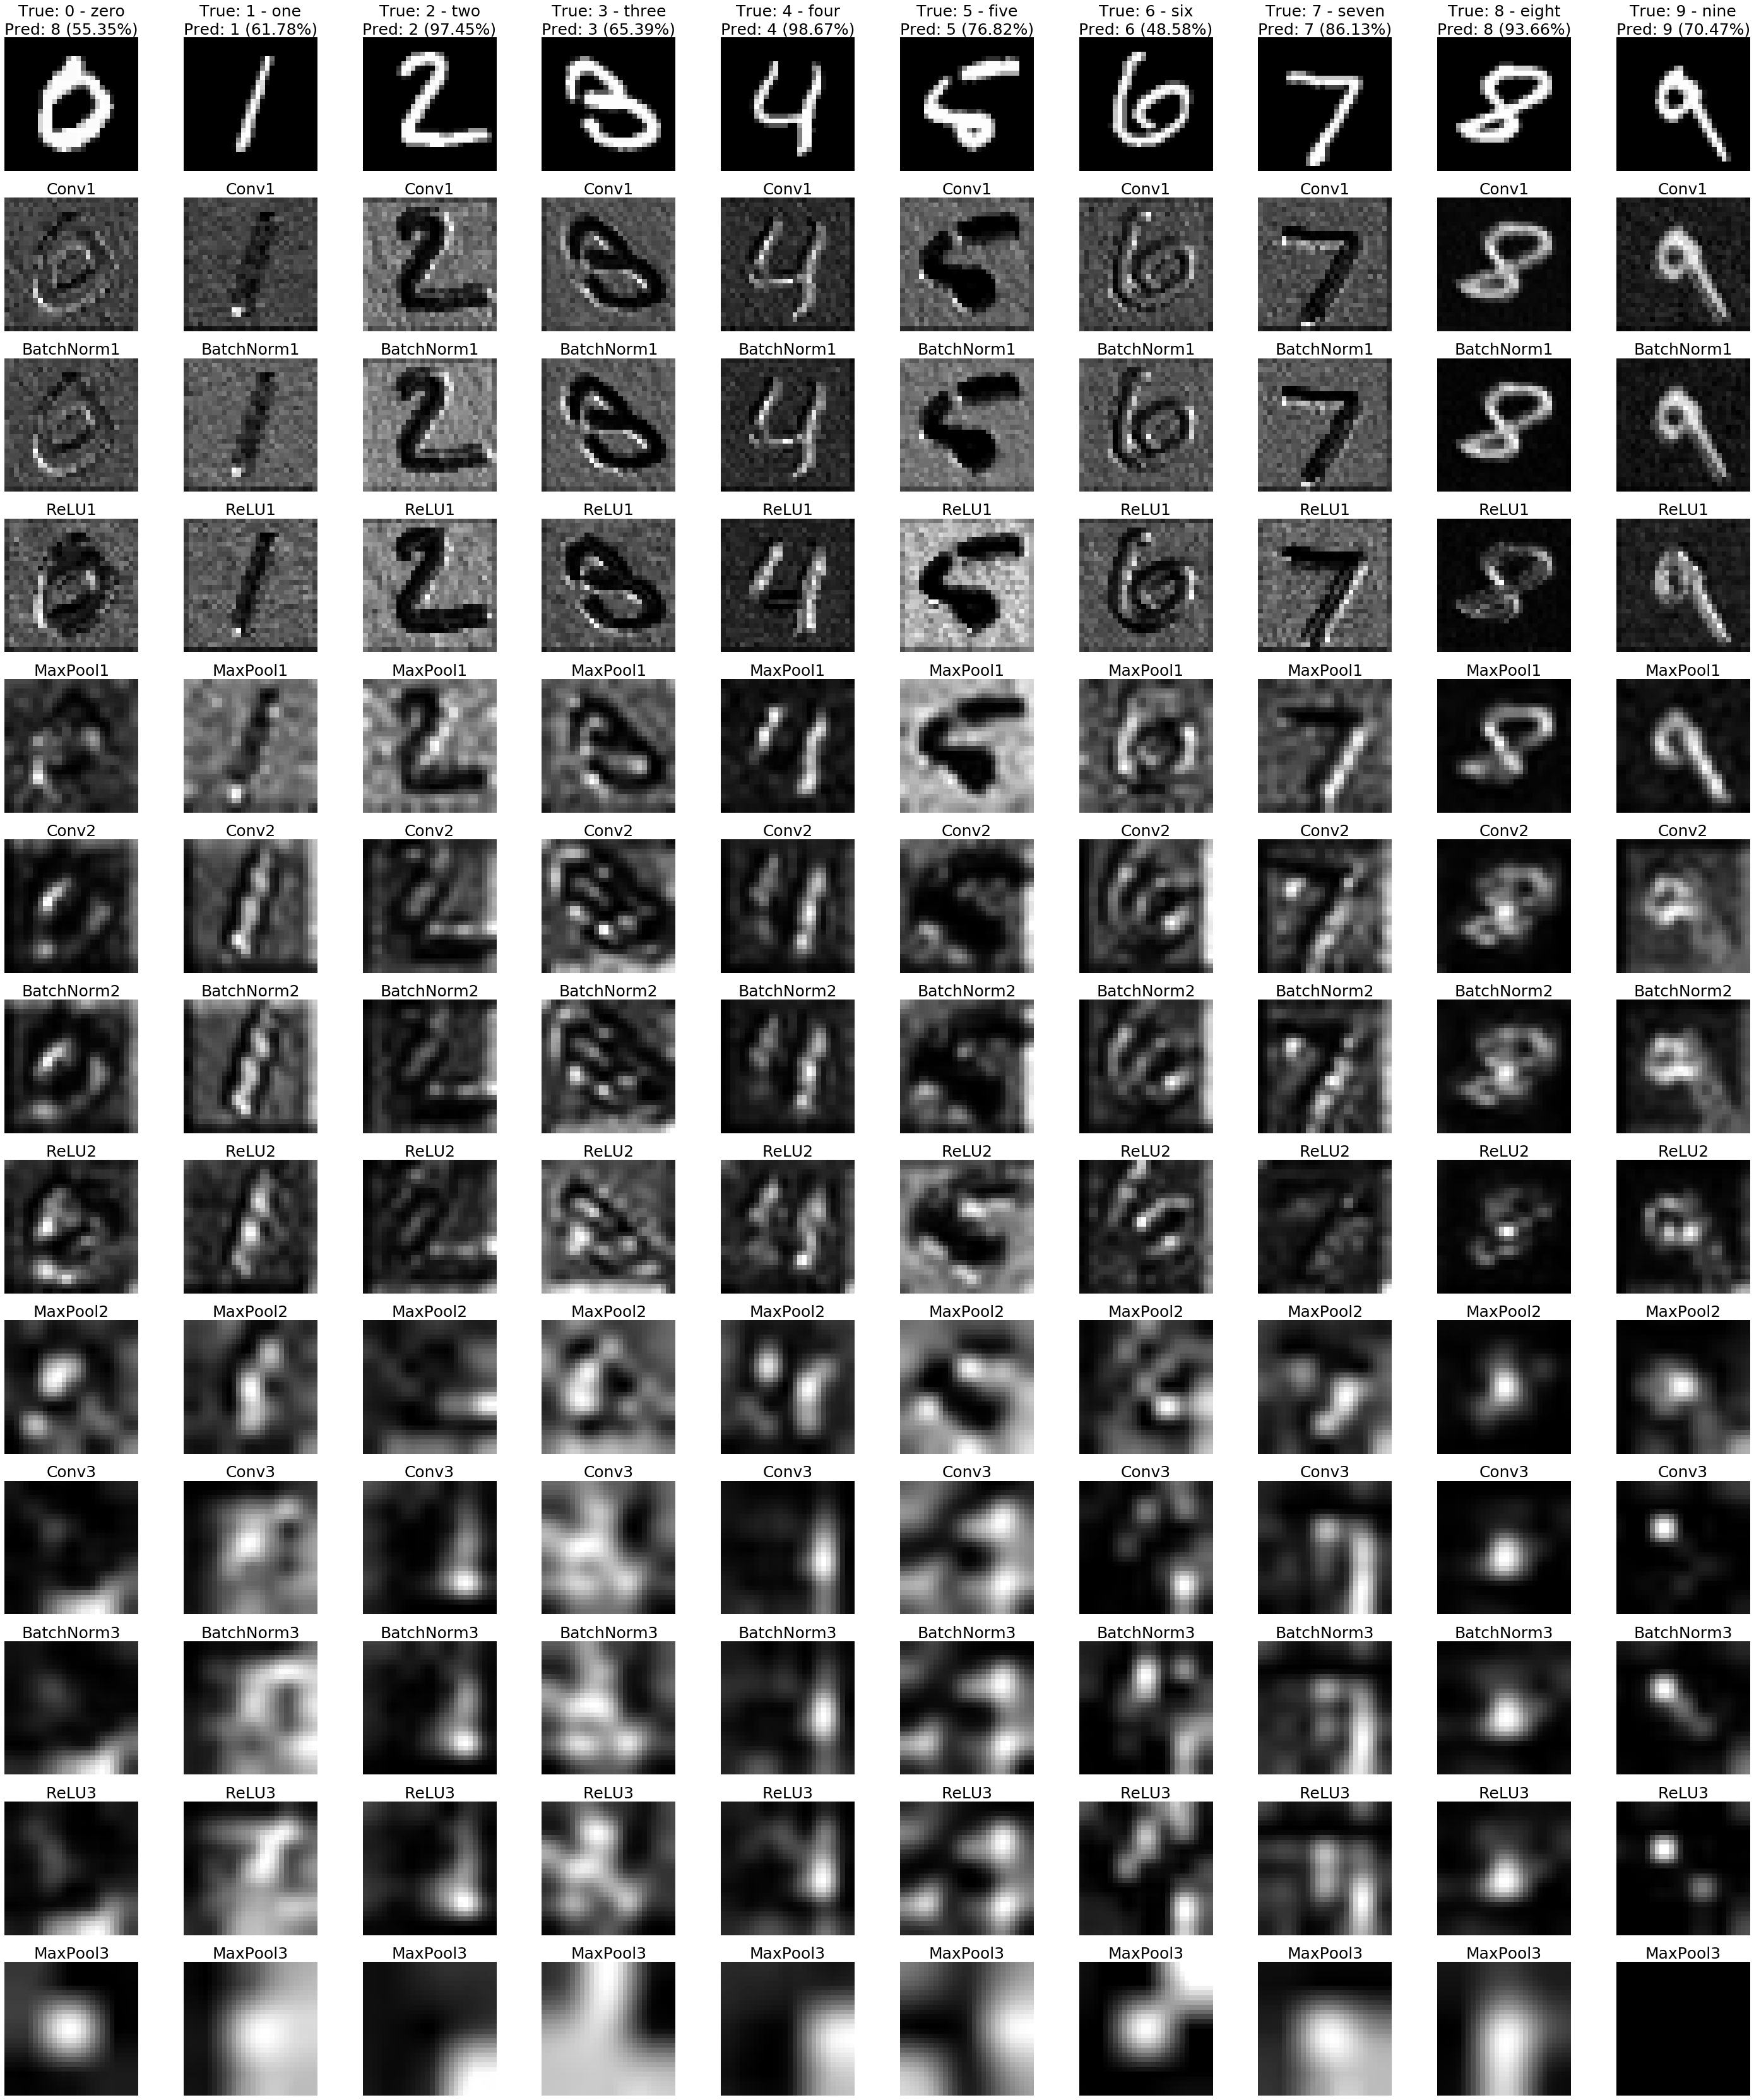

In [10]:
f, ax = plt.subplots(1+nb_layer,10,figsize=(50,5*nb_layer))
for i in range(10):
    ax[0,i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
for i in range(nb_layer):
    for j in range(nb_class):
        ax[i+1,j].imshow(outputs[j+(nb_class*i)], 'gray')
        ax[i+1,j].set_title(layers[i], size=25)
        ax[i+1,j].axis('off')

## CIFAR10

In [11]:
nb_class = 10
nb_layer = 12
outputs = np.zeros((nb_layer*nb_class,)+original_images_cifar10.shape[1:-1], dtype=np.float32)
probs = np.zeros(nb_layer*nb_class)
preds = np.zeros(nb_layer*nb_class)

n = 50
sigma = 3
output_size = (32,32)

for layer_idx in range(nb_layer):
    grad_cam_cifar10 = GradCam(cifar10_model)
    for i in range(nb_class):
        img = pre_images_cifar10[i].unsqueeze(0)
        output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, layer_idx, grad_cam_cifar10, i)
        outputs[i+(nb_class*layer_idx)] = output
        probs[i+(nb_class*layer_idx)] = prob
        preds[i+(nb_class*layer_idx)] = pred

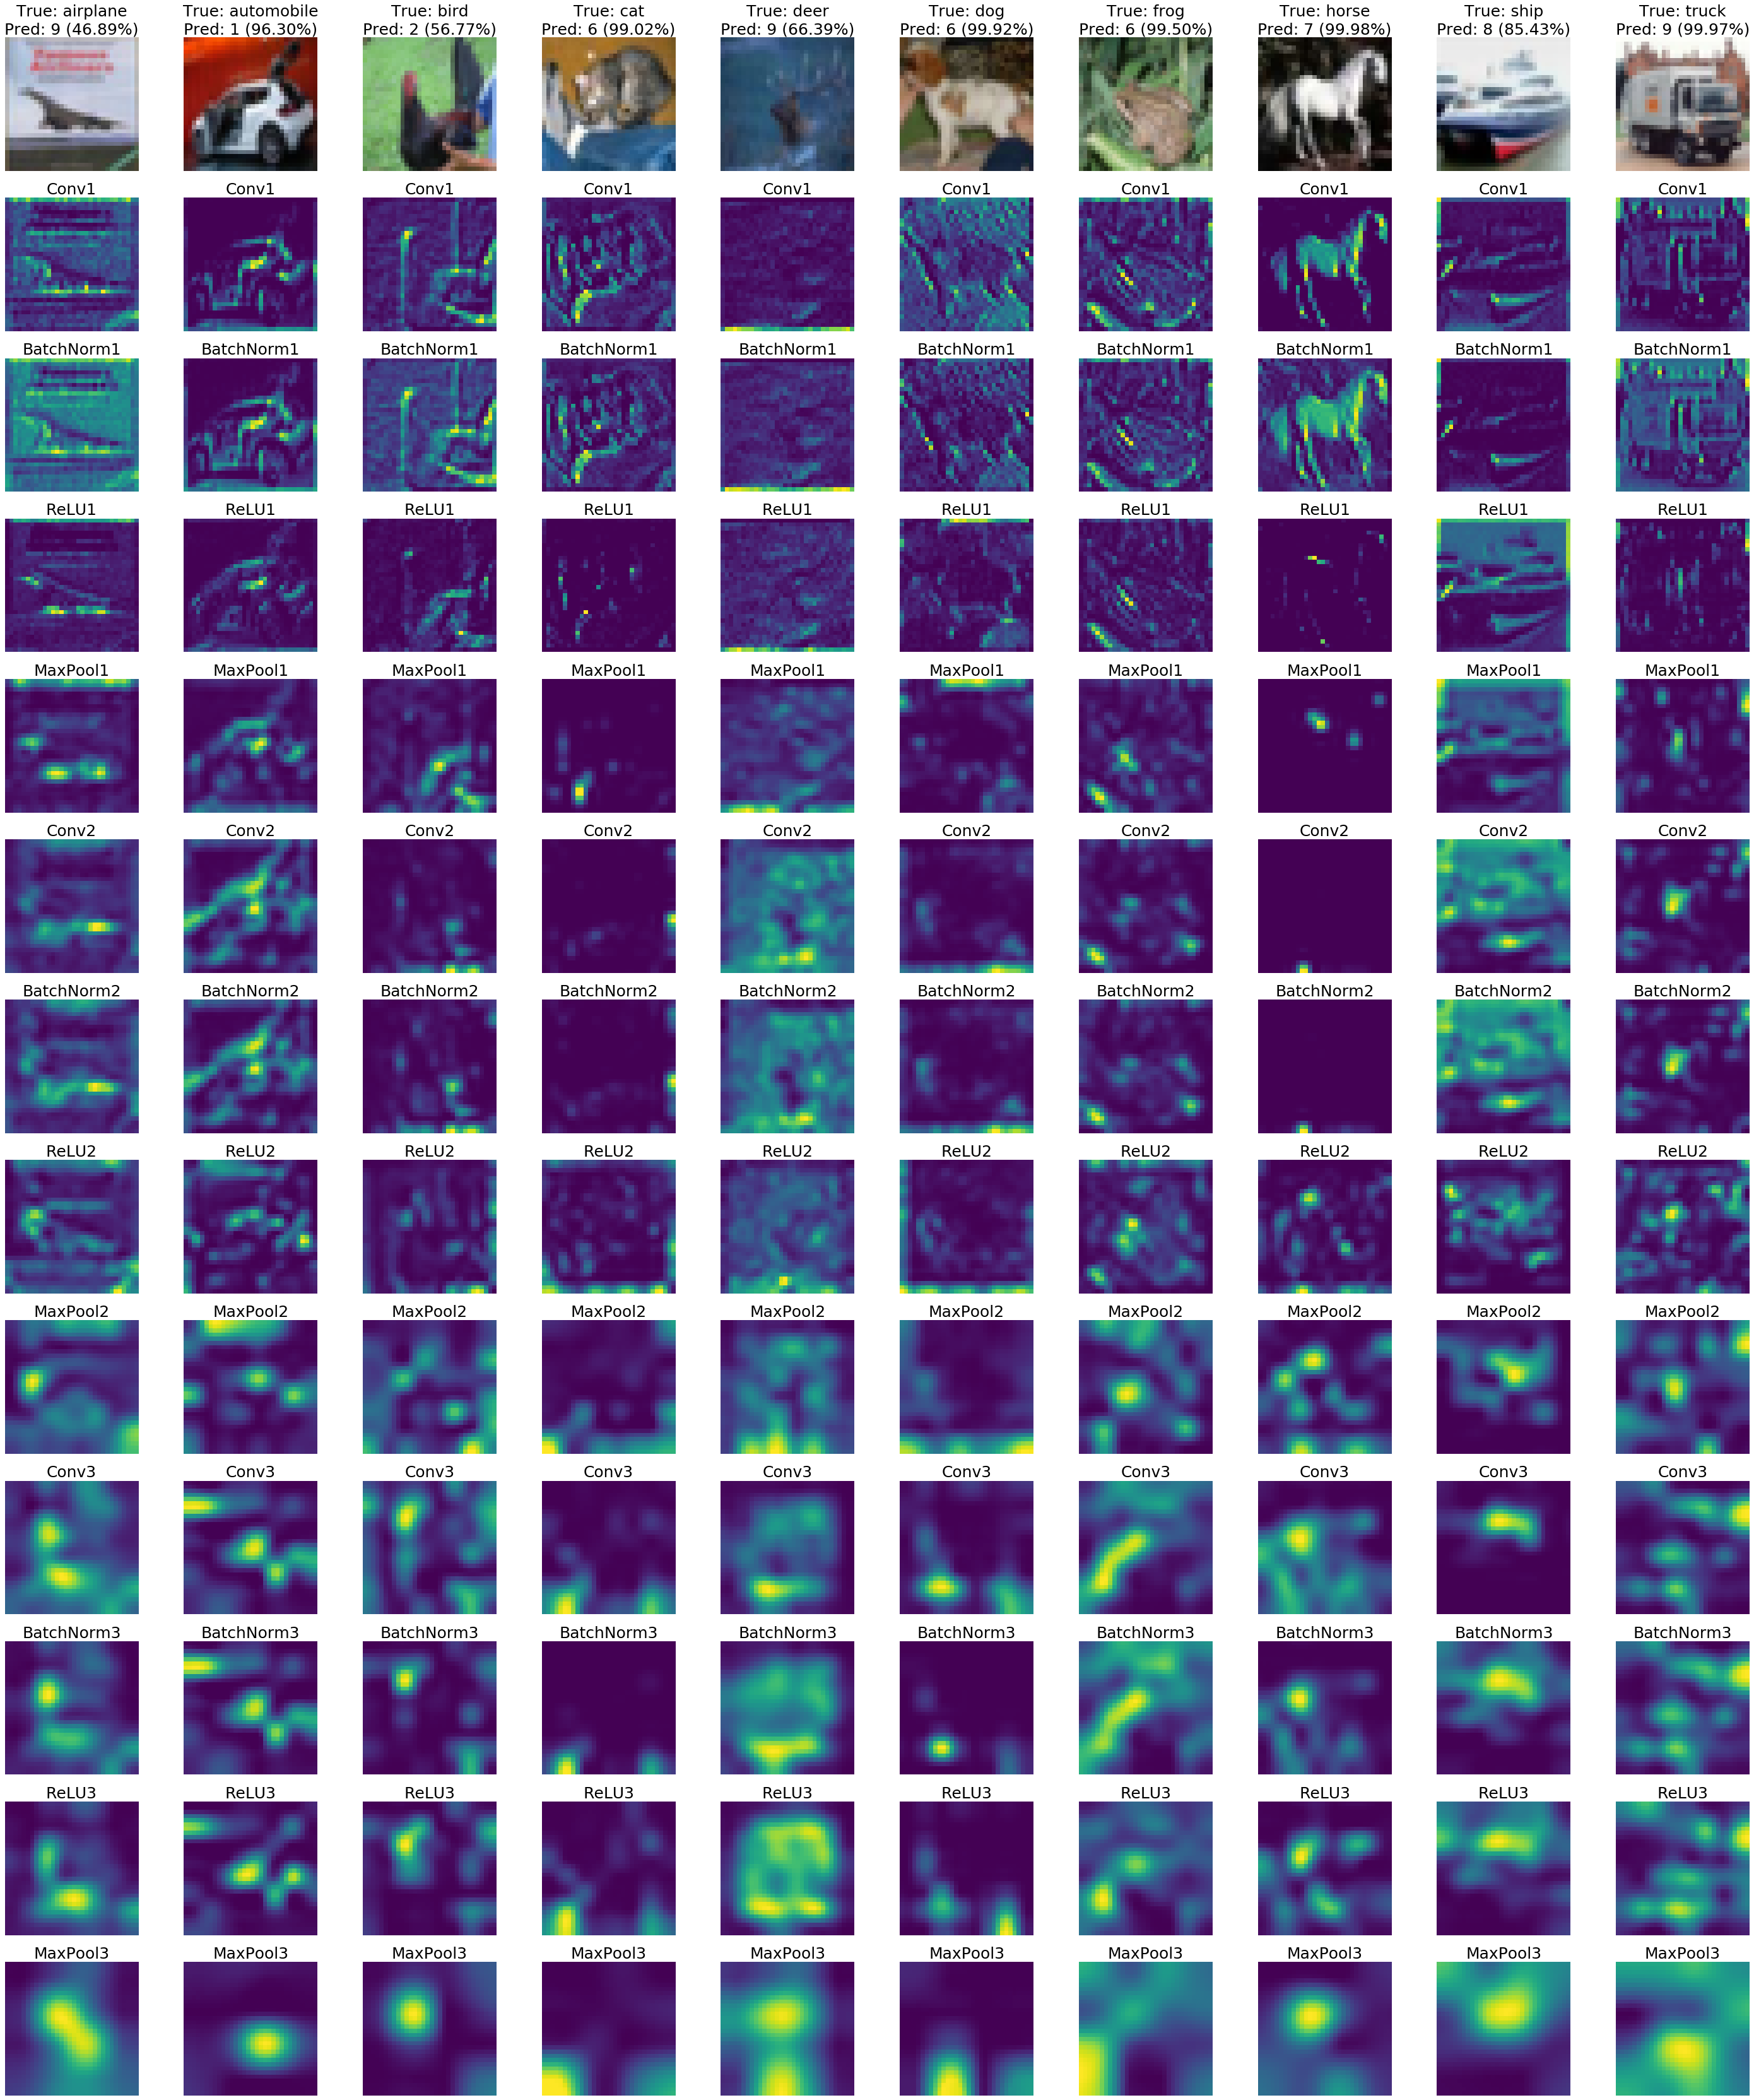

In [12]:
f, ax = plt.subplots(1+nb_layer,10,figsize=(50,5*nb_layer))
for i in range(10):
    ax[0,i].imshow(original_images_cifar10[i].squeeze())
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
for i in range(nb_layer):
    for j in range(nb_class):
        ax[i+1,j].imshow(outputs[j+(nb_class*i)])
        ax[i+1,j].set_title(layers[i], size=25)
        ax[i+1,j].axis('off')